# **Title**

#### **Group members**
> **Chau**, Alyson (45652765)
<br>**Lee**, Jaye (83765560)
<br>**Nejati**,Koorosh (65809485)
<br>**Sun**, Oakley (48588198)

### **Introduction**

**ADD**: provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

This year, we are presented with a very interesting and fun opportunity, which includes working with data from a Minecraft server. The Pacific Laboratory for Artificial Intelligence, 
PLAI for short, led by Dr. Frank Wood has built a custom Minecraft server to collect real-time data on how individuals play and behave within the game world. However, running the Minecraft server involves real costs, such as software licensing, hardware, and human resources. To make the most of these investments, the team needs to focus on recruiting players who are most likely to generate a significant amount of usable data. 
This leads to our central research question: What skill set and age are most likely to contribute the most data?
We will use the players.csv file provided to us, which includes data of 197 participants, as well as important information on them for our question such as played hours, age, and skillset. 
Answering this question will help the research team better target their recruitment strategy, ensuring their resources are used effectively while maximizing the amount of high-quality data collected from participants.


**Basic information**

<u>Broad question 2</u>: What skill set and age are most likely to contribute the most data?

<u>Dataset used</u>: players.csv (197 rows, 7 cols)
>Column name - *(if numeric)*: max/min/mean
<br>Column name - *(if non-numeric)*: unique value (frequency in data)
<br>&ensp;&ensp;- Ratio of values in data

\+ Game experience - pro (14), veteran (48), regular (36), amateur (63), beginner (35)
<br>&ensp;&ensp;- 7%, 24%, 18%, 32%, 18%
<br>+ Subscribed to game-related newsletter? - yes (144), no (52)
<br>&ensp;&ensp; - 73%, 27%
<br>+ Email study participant used
<br>+ Hours spent on server - 223.1/0/5.84
<br>+ Name of study participant
<br>+ Gender of study participant - male (124), female (37), non-binary (15), prefer not to say (11), agender (2), two-spirited (6), other (1)
<br>&ensp;&ensp;- 63%, 19%, 8%, 6%, 1%, 3%, 0.5%
<br>+ Age of study participant - 50/8/25.5

### **Methods & Results**

**ADD**: method summary
\
<u>*all*</u> non-code text under \<temp> marks extra notes made during the coding process, should be deleted later. They are only for reference when writing the method summary.
\
**TODO**: note: all figures should have a figure number and a legend

In [2]:
# loading libraries and data
library(tidyverse)
player_url <- "https://raw.githubusercontent.com/Jaye136/project_data/refs/heads/main/players.csv"
players_raw <- read_csv(player_url)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# cleaning & wrangling
# <temp>
# 1. Select columns used
# 2. Remove NA values
players_clean <- players_raw |>
select(experience, played_hours, Age) |>
filter(!is.na(experience), !is.na(played_hours), !is.na(Age))

In [7]:
# creating a relavent summary to perform exploratory analysis
# <temp>
# want to find is there a relationship between experience and age/noticeable trends/etc.
# we are making played_hours into categories to visualise broad time ranges with the colour argument of ggplot
# as average is ~6hrs, and max is 223hrs, we create narrower categories for [0, 10], and broader categories for 10+
# minimal: 0-1 hrs
# trial: 1-2 hrs
# session: 2-5 hrs
# casual: 5-30 hrs
# moderate: 30-100 hrs
# long_term: 100+ hrs

# <temp>
# convert experience to numerical values (so can visualise)
# reason we dont do barplot: hard to see axis values for age (if stacked, hard to see exact, if count/identity, inaccurate)
players_exploratory <- players_clean |>
mutate(experience = fct_recode(as_factor(experience),
                               "5" = "Pro",
                               "4" = "Veteran",
                               "3" = "Regular",
                               "2" = "Amateur",
                               "1" = "Beginner")) |>
mutate(experience = as.numeric(experience))

# <temp>
# convert played_hours to factor datatype, so we can colour
players_exploratory$played_range_hrs <- cut(players_exploratory$played_hours, breaks = c(0, 1, 2, 5, 30, 100, Inf),
                            right = FALSE,
                           labels = c("minimal", "trial", "session", "casual", "moderate", "long_term"))

# select only needed
players_exploratory <- players_exploratory |>
select(experience, Age, played_range_hrs)

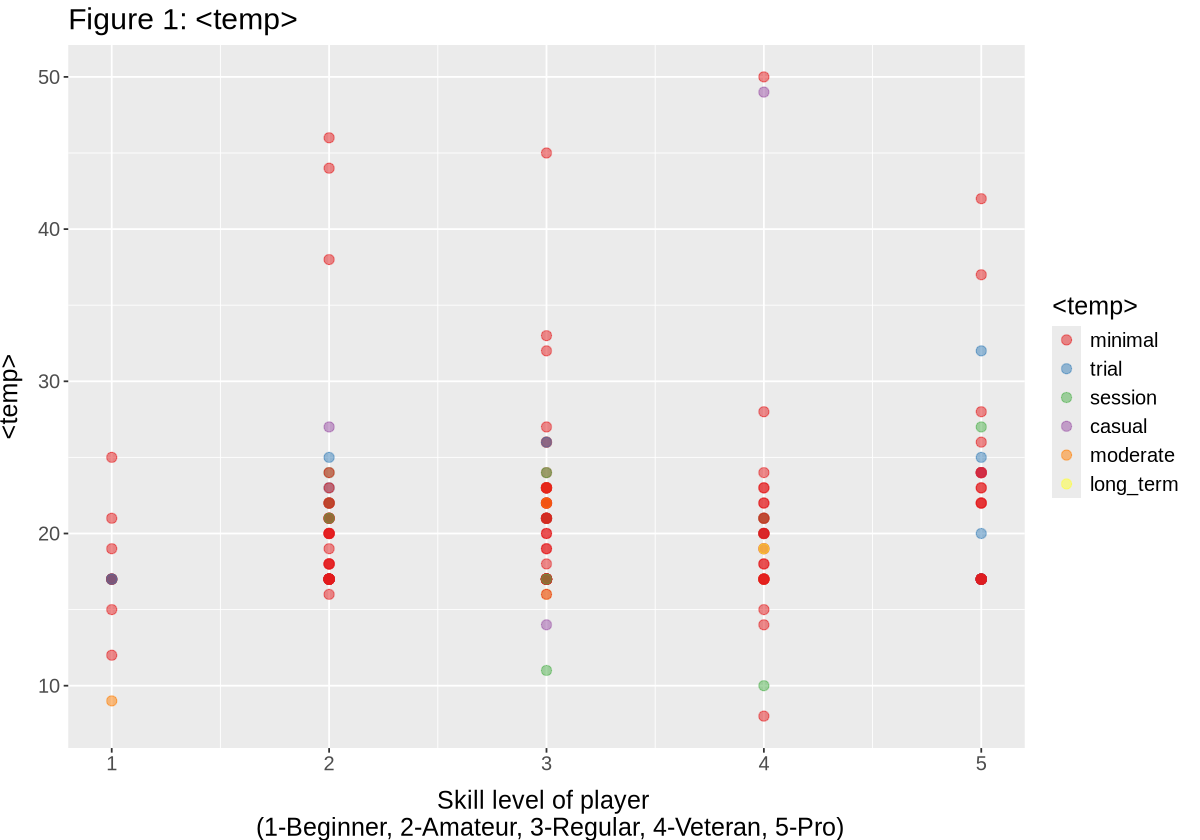

In [8]:
# visualising relevent parts of the data for exploratory analysis
# <temp>
# add labels, plot size options, other aesthetic options
# only preliminary, can correct later
options(repr.plot.height = 7, repr.plot.width = 10)
players_exploratory_vis <- players_exploratory |>
ggplot(aes(x = experience, y = Age, colour = played_range_hrs)) + geom_point(size = 2.5, alpha = 0.5) +
scale_colour_brewer(palette = "Set1") + theme(text = element_text(size = 15), axis.title.x = element_text(vjust = -1), axis.title.y = element_text(vjust = 3), plot.title = element_text(vjust = 1)) +
labs(x = "Skill level of player \n (1-Beginner, 2-Amateur, 3-Regular, 4-Veteran, 5-Pro)",
    y = "<temp>", title = "Figure 1: <temp>", colour = "<temp>")
players_exploratory_vis

In [9]:
# perform data analysis
# <temp>
# if there was relation found in previous part, WHAT demographic provides most data
# do with regression? use players_clean, NOT players_explore. predicting played_hours using age and subscribe
# create tibble of test values (EG. 15 yr old, regular), get model to predict played hrs? make list of demographics and test which one gives the highest played hours -> kind of like summary
# model learns from data, able to guess if given new observations, what demographic on average would give highest values

In [10]:
# visualise the data analysis

### **Discussion**

<u>What we found</u>: **ADD**
<br><u>What we expected?</u>: 
<br><u>Effects of findings</u>: 
<br><u>Future questions</u>: 

### **References**

Pacific Labratory for Artificial Intelligence (PLAI). (2024). *PLAICRAFT Player Data*, [Dataset]. UBC Department of Statistics. https://canvas.ubc.ca/courses/153254/files/37600949?wrap=1

Converting range of values to categories:
<br>**PROPERLY CITE** https://www.statology.org/cut-function-in-r/

### **Scratch work**

In [11]:
# This section includes nothing that needs to be marked. It is for the reproducibility of the data descriptions.

In [12]:
# information about players.csv
ncol(players_raw)
nrow(players_raw)

# information about game experience
filter(players_raw, experience == "Pro") |> nrow()
filter(players_raw, experience == "Veteran") |> nrow()
filter(players_raw, experience == "Regular") |> nrow()
filter(players_raw, experience == "Amateur") |> nrow()
filter(players_raw, experience == "Beginner") |> nrow()

# subscribed to newsletter?
filter(players_raw, subscribe == TRUE) |> nrow()
filter(players_raw, subscribe == FALSE) |> nrow()

# information about hours spent on server
slice_max(players_raw, played_hours, n = 1) |> distinct(played_hours) |> pull()
slice_min(players_raw, played_hours, n = 1) |> distinct(played_hours) |> pull()
summarise(players_raw, avg_play = mean(played_hours, na.rm = TRUE)) |> pull()

# information about player genders
filter(players_raw, gender == "Male") |> nrow()
filter(players_raw, gender == "Female") |> nrow()
filter(players_raw, gender == "Non-binary") |> nrow()
filter(players_raw, gender == "Prefer not to say") |> nrow()
filter(players_raw, gender == "Agender") |> nrow()
filter(players_raw, gender == "Two-Spirited") |> nrow()
filter(players_raw, gender == "Other") |> nrow()

# information about ages of participants
slice_max(players_raw, Age, n = 1) |> distinct(Age) |> pull()
slice_min(players_raw, Age, n = 1) |> distinct(Age) |> pull()
summarise(players_raw, avg_age = mean(Age, na.rm = TRUE)) |> pull()

[1] 7

[1] 196

[1] 14

[1] 48

[1] 36

[1] 63

[1] 35

[1] 144

[1] 52

[1] 223.1

[1] 0

[1] 5.845918

[1] 124

[1] 37

[1] 15

[1] 11

[1] 2

[1] 6

[1] 1

[1] 50

[1] 8

[1] 20.52062